kgmyh@naver.com

# 데이터 불러오기
- 2019년 주유소들의 일자별 가격 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 상반기, 하반기 주유소 가격 데이터 조회
first = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv', encoding='utf-8')
second = pd.read_csv('data/2019년 하반기 주유소 판매가격.csv', encoding='utf-8')
first.shape, second.shape

((90590, 11), (91124, 11))

In [10]:
# 상반기, 하반기 DataFrame 합치기 (concat, join, merge)
df = pd.concat([first, second], ignore_index=True)#, axis=0)
df.shape

(181714, 11)

In [12]:
# DataFrame 기본 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.3+ MB


In [13]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0


In [14]:
df.tail()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100
181713,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191231,GS칼텍스,셀프,0,1540,1389,1100


In [16]:
df.describe() #숫자형 요약통계

,기간,고급휘발유,휘발유,경유,실내등유
count,1.817140e+05,181714.000000,181714.000000,181714.000000,181714.000000
mean,2.019067e+07,763.284139,1567.148161,1435.564816,454.800412
std,3.453131e+02,937.368150,182.942737,171.892815,572.002790
min,2.019010e+07,0.000000,0.000000,0.000000,0.000000
25%,2.019040e+07,0.000000,1459.000000,1333.000000,0.000000
50%,2.019070e+07,0.000000,1529.000000,1389.000000,0.000000
75%,2.019093e+07,1768.000000,1599.000000,1478.000000,1100.000000
max,2.019123e+07,2699.000000,2356.000000,2196.000000,1640.000000


In [17]:
df.describe(include='object') #문자열 컬럼의 요약통계

,번호,지역,상호,주소,상표,셀프여부
count,181714,181714,181714,181714,181714,181714
unique,512,25,507,512,8,2
top,A0009827,서울 강남구,신성주유소,서울특별시 강북구 삼양로 217 (미아동),SK에너지,일반
freq,365,14597,1095,365,71062,108492


In [19]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()
df['상표'].value_counts()

SK에너지     71062
GS칼텍스     49494
현대오일뱅크    28583
S-OIL     27027
알뜰주유소      4021
자가상표        982
알뜰(ex)      365
NH-OIL      180
Name: 상표, dtype: int64

In [21]:
# 지역 컬럼의 고유값 조회
df['지역'].value_counts()

서울 강남구     14597
서울 서초구     13762
서울 강서구     12572
서울 영등포구    11667
서울 송파구     11630
서울 양천구      9149
서울 성북구      8080
서울 동대문구     7996
서울 구로구      7917
서울 도봉구      6711
서울 광진구      6450
서울 은평구      6199
서울 성동구      6192
서울 관악구      5997
서울 강동구      5897
서울 중랑구      5719
서울 서대문구     5594
서울 노원구      5466
서울 용산구      5439
서울 금천구      4738
서울 강북구      4736
서울 중구       4235
서울 마포구      4051
서울 동작구      3644
서울 종로구      3276
Name: 지역, dtype: int64

In [23]:
df['셀프여부'].value_counts()

일반    108492
셀프     73222
Name: 셀프여부, dtype: int64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series)`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

In [24]:
df.head(3)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0


In [25]:
def test(s):
    return s.split(' ')[1]

df['지역'].apply(test)

0         강남구
1         강남구
2         강남구
3         강남구
4         강남구
         ... 
181709    중랑구
181710    중랑구
181711    중랑구
181712    중랑구
181713    중랑구
Name: 지역, Length: 181714, dtype: object

In [30]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출)
df['구'] = df['지역'].str.split(' ').str[1]
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,강남구


In [35]:
import time
a = time.time() #1970.01.01 00:00:00 실행시점까지 초단위로 계산한 값.
#코드
b = time.time()
b-a #몇초
print(a)

1615770918.7016704


In [37]:
# 기간 컬럼을 datetime 타입으로 변경
# 20190101  %Y:년도(4자리), %m:월, %d:일, %H:시간, %M:분, %S: 초 (2자리 - 10,03)
df['기간'] = pd.to_datetime(df['기간'], format='%Y%m%d')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      181714 non-null  object        
 1   지역      181714 non-null  object        
 2   상호      181714 non-null  object        
 3   주소      181714 non-null  object        
 4   기간      181714 non-null  datetime64[ns]
 5   상표      181714 non-null  object        
 6   셀프여부    181714 non-null  object        
 7   고급휘발유   181714 non-null  int64         
 8   휘발유     181714 non-null  int64         
 9   경유      181714 non-null  int64         
 10  실내등유    181714 non-null  int64         
 11  구       181714 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 16.6+ MB


In [40]:
# read_csv() 로 읽을때 변환. 
# parse_dates=['datetime 타입으로 읽을 컬럼', ...]
# date_parser=변환함수
from datetime import datetime
def parser(x):
    # strftime(): datetime->str (to_char())
    # strptime(): str -> datetime (to_date())
    # x: 컬럼의 원소들
    return datetime.strptime(x, '%Y%m%d')
first2 = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv',
                     parse_dates=['기간'],
                     date_parser=lambda x: datetime.strptime(x, '%Y%m%d'))
#                      date_parser=parser)  #'기간' 컬럼의 값을 읽어올때 parser함수를 이용해 datetime 타입으로 변환해라.
first2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90590 entries, 0 to 90589
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      90590 non-null  object        
 1   지역      90590 non-null  object        
 2   상호      90590 non-null  object        
 3   주소      90590 non-null  object        
 4   기간      90590 non-null  datetime64[ns]
 5   상표      90590 non-null  object        
 6   셀프여부    90590 non-null  object        
 7   고급휘발유   90590 non-null  int64         
 8   휘발유     90590 non-null  int64         
 9   경유      90590 non-null  int64         
 10  실내등유    90590 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 7.6+ MB


In [48]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성
# df['년'] = df['기간'].dt.year
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.dayofweek #요일 (0:월, 6:일)

In [52]:
# df.drop(labels='년', axis=1, inplace=True)
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,1,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,2,2
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,3,3
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,4,4
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,5,5


In [53]:
# 요일을 문자열로 변환((0:월, 6:일))
def change_month_str(x):
    if x==0:
        return '월'
    elif x==1:
        return '화'
    elif x==2:
        return '수'
    elif x==3:
        return '목'
    elif x==4:
        return '금'
    elif x==5:
        return '토'
    elif x==6:
        return '일'

In [56]:
df['요일'] = df['요일'].apply(change_month_str)
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,화,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,수,2
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,목,3
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,금,4
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,토,5


In [64]:
# 휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values('휘발유', ascending=False).head()
# df.sort_values(['휘발유','월'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
177210,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,중구,9,화,24
177216,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,중구,9,월,30
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,화,1
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,중구,9,수,25
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,목,26


In [71]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
# 상위, 하위 N개 조회=>정렬후에 head(N)

df[df['휘발유']!=0].sort_values('휘발유').head()

# df.sort_values('휘발유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,목,7
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,목,31
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,수,30
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,금,1
82998,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-26,GS칼텍스,셀프,0,1265,1165,0,은평구,1,토,26


In [74]:
# 고급휘발유 가격이 비싼 5개 조회
df.sort_values('고급휘발유', ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,화,1
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,목,26
177213,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-27,SK에너지,일반,2699,2356,2196,0,중구,9,금,27
177214,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-28,SK에너지,일반,2699,2356,2196,0,중구,9,토,28
177215,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-29,SK에너지,일반,2699,2356,2196,0,중구,9,일,29


In [77]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['고급휘발유']!=0].sort_values('고급휘발유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
17460,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-15,S-OIL,셀프,1397,1275,1175,0,강서구,1,화,15
17459,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-14,S-OIL,셀프,1397,1275,1175,0,강서구,1,월,14
17458,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-13,S-OIL,셀프,1397,1275,1175,0,강서구,1,일,13
17457,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-12,S-OIL,셀프,1397,1275,1175,0,강서구,1,토,12
17456,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2019-01-11,S-OIL,셀프,1397,1275,1175,0,강서구,1,금,11


In [78]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values('경유', ascending=False).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,중구,9,수,25
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,9,목,26
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,10,화,1
177216,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,중구,9,월,30
177215,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-29,SK에너지,일반,2699,2356,2196,0,중구,9,일,29


In [79]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df[df['경유']!=0].sort_values('경유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2,목,7
50707,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2019-01-13,알뜰(ex),셀프,0,1297,1157,0,서초구,1,일,13
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2,금,1
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,1,목,31
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,1,수,30


In [87]:
# 상표별 휘발유 평균가격 조회
# df.loc[df['휘발유']!=0, '휘발유'].mean()# 전체 평균(0은 제외) 
상표_mean = df.loc[df['휘발유']!=0].groupby('상표')['휘발유'].mean()
상표_mean

상표
GS칼텍스     1564.313469
NH-OIL    1449.088889
S-OIL     1532.472987
SK에너지     1612.782625
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
자가상표      1492.085540
현대오일뱅크    1515.670352
Name: 휘발유, dtype: float64

In [86]:
df.groupby('상표')['휘발유'].mean()

상표
GS칼텍스     1564.029014
NH-OIL    1449.088889
S-OIL     1532.302882
SK에너지     1612.147153
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
자가상표      1492.085540
현대오일뱅크    1515.458244
Name: 휘발유, dtype: float64

In [109]:
상표_mean

상표
GS칼텍스     1564.313469
NH-OIL    1449.088889
S-OIL     1532.472987
SK에너지     1612.782625
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
자가상표      1492.085540
현대오일뱅크    1515.670352
Name: 휘발유, dtype: float64

In [98]:
for i in range(상표_mean.size):
    print(i, np.round(상표_mean[i],1))

0 1564.0
1 1449.0
2 1532.0
3 1613.0
4 1431.0
5 1448.0
6 1492.0
7 1516.0


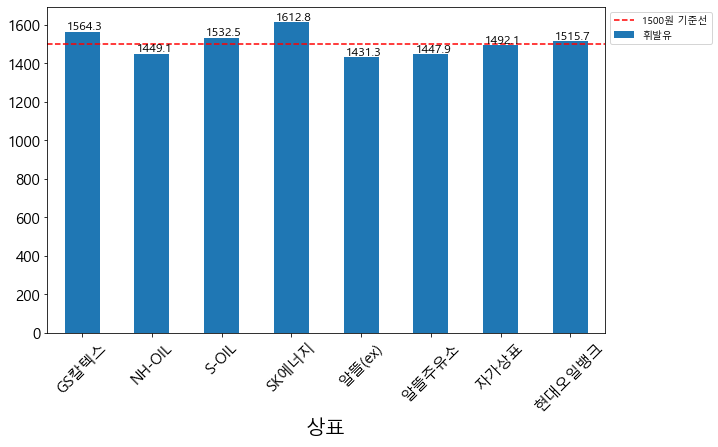

In [115]:
# 상표별 휘발유 평균가격 시각화
plt.figure(figsize=(10,6))
상표_mean.plot.bar(rot=45)#, label='휘발유가격')#figsize=(10,6))

#텍스트로 각 막대에 값을 출력
for i in range(상표_mean.size):
    plt.text(i-0.22, #X축 좌표
             상표_mean[i]+10,  #Y축 좌표
             np.round(상표_mean[i],1), #출력할 text
             fontsize=12)
plt.axhline(y=1500, color='r', linestyle='--', label='1500원 기준선')

plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.show()

In [121]:
# 셀프주유소와 일반주유소 개수 확인
self_count = df['셀프여부'].value_counts()#normalize=True)
self_count

일반    108492
셀프     73222
Name: 셀프여부, dtype: int64

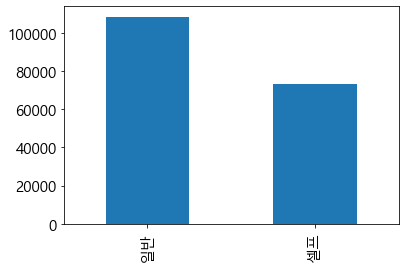

In [123]:
# 셀프주유소와 일반주유소 개수 시각화
self_count.plot(kind='bar')
plt.show()

In [125]:
# 셀프 여부에 따른 휘발유 평균 가격 비교
df[df['휘발유']!=0].groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1490.262029
일반    1619.690059
Name: 휘발유, dtype: float64

In [126]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
df[df['휘발유']!=0].groupby(['셀프여부', '상표'])['휘발유'].mean()

셀프여부  상표    
셀프    GS칼텍스     1481.410074
      S-OIL     1481.437428
      SK에너지     1505.054771
      알뜰(ex)    1431.347945
      알뜰주유소     1434.726027
      자가상표      1494.409449
      현대오일뱅크    1483.686804
일반    GS칼텍스     1610.516144
      NH-OIL    1449.088889
      S-OIL     1579.789061
      SK에너지     1691.365496
      알뜰주유소     1455.372511
      자가상표      1491.740351
      현대오일뱅크    1534.510147
Name: 휘발유, dtype: float64

In [129]:
 셀프여부_휘발유_mean = df[df['휘발유']!=0].pivot_table(values='휘발유',
                                                   index='상표',
                                                   columns='셀프여부',
                                                   aggfunc='mean')
셀프여부_휘발유_mean    

셀프여부,셀프,일반
상표,,
GS칼텍스,1481.410074,1610.516144
NH-OIL,NaN,1449.088889
S-OIL,1481.437428,1579.789061
SK에너지,1505.054771,1691.365496
알뜰(ex),1431.347945,NaN
알뜰주유소,1434.726027,1455.372511
자가상표,1494.409449,1491.740351
현대오일뱅크,1483.686804,1534.510147


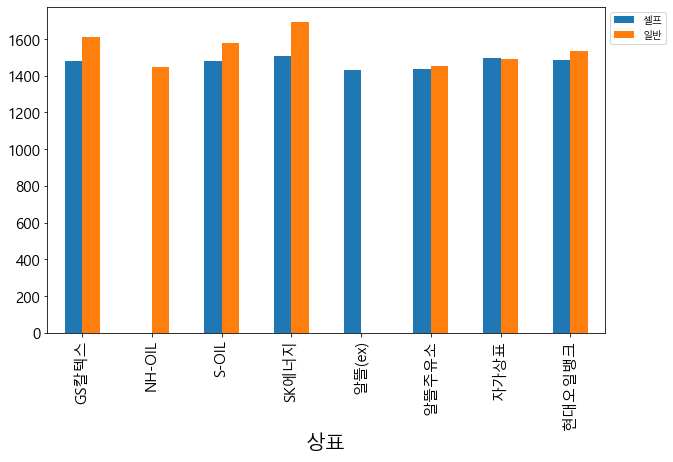

In [131]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
셀프여부_휘발유_mean.plot(kind='bar', figsize=(10,6))
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [134]:
df[['셀프여부', '휘발유']].head()

,셀프여부,휘발유
0,셀프,1465
1,셀프,1465
2,셀프,1465
3,셀프,1465
4,셀프,1465


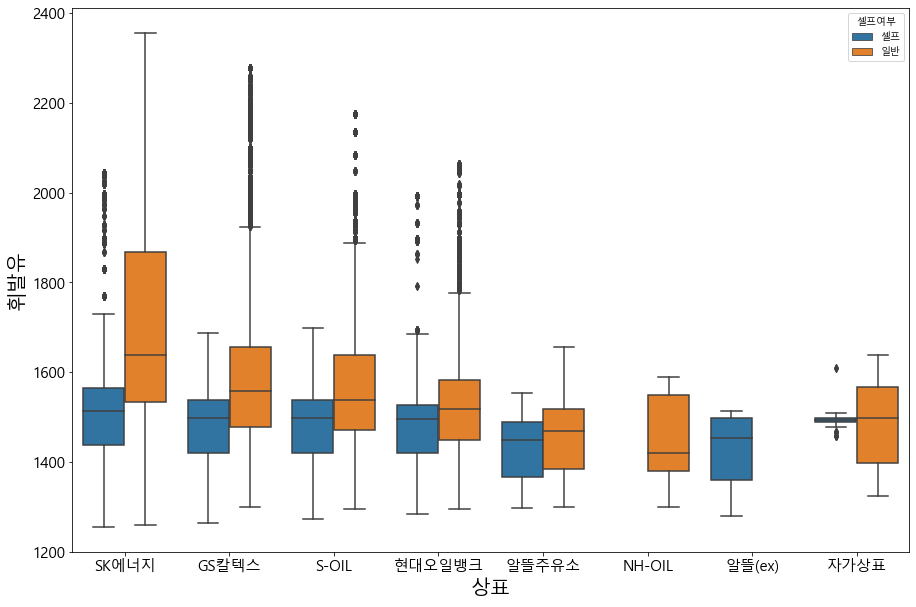

In [138]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
plt.figure(figsize=(15,10))
# sns.boxplot(x='셀프여부', y='휘발유', data=df)
# sns.boxplot(x='셀프여부', y='휘발유', data=df[df['휘발유']!=0]) #0원 빼고 #셀프여부변 휘발유가격의 분포
sns.boxplot(x='상표', y='휘발유', hue='셀프여부', data=df[df['휘발유']!=0])
plt.show()

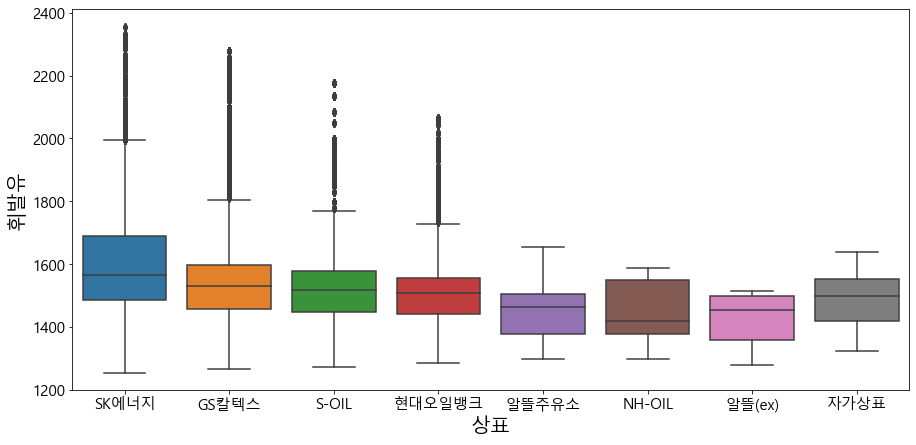

In [141]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
plt.figure(figsize=(15,7))
sns.boxplot(x='상표', y='휘발유', data=df[df['휘발유']!=0])
plt.show()

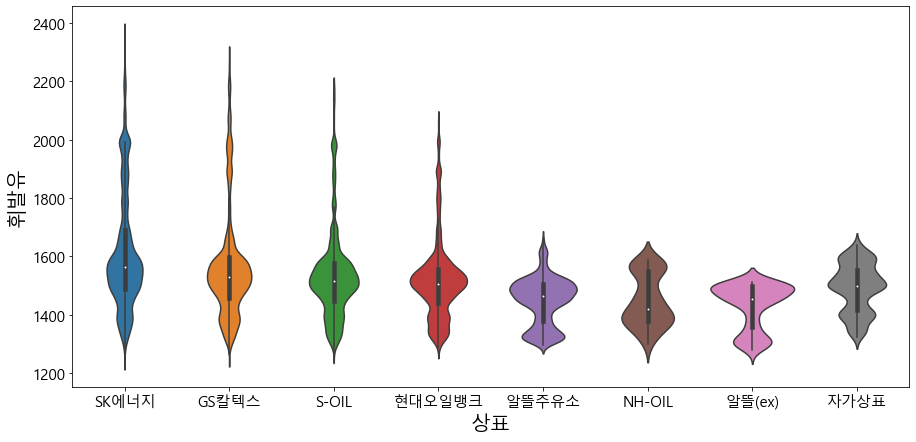

In [142]:
plt.figure(figsize=(15,7))
sns.violinplot(x='상표', y='휘발유', data=df[df['휘발유']!=0])
plt.show()

In [148]:
# 구별 휘발유 가격의 평균
구_휘발유_평균 = df.groupby('구')['휘발유'].mean().sort_values()
구_휘발유_평균

구
강북구     1453.517525
중랑구     1469.009092
금천구     1477.121992
은평구     1481.964026
강서구     1488.818088
광진구     1490.597054
도봉구     1494.171062
동대문구    1506.833542
성북구     1507.948267
동작구     1512.470911
양천구     1512.890261
관악구     1518.128564
송파구     1518.957954
구로구     1525.410383
서대문구    1528.943332
노원구     1531.221551
영등포구    1568.279506
강동구     1576.685264
서초구     1577.131304
성동구     1583.659561
마포구     1689.755616
강남구     1713.093581
종로구     1838.554945
용산구     1882.049825
중구      1976.948052
Name: 휘발유, dtype: float64

In [151]:
구_휘발유_평균.mean()

1576.966450406335

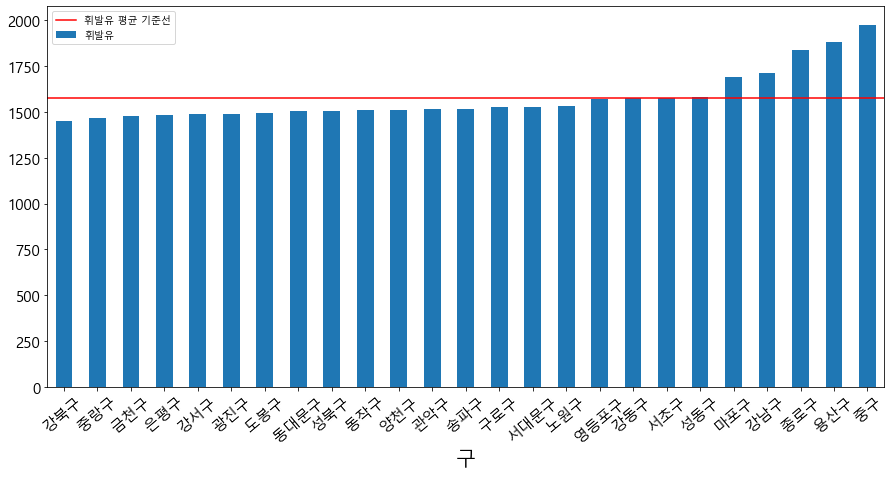

In [156]:
# 구별 휘발유 가격의 평균 시각화
구_휘발유_평균.plot(kind='bar', figsize=(15,7), rot=40)

# 평균가격을 기준선
plt.axhline(y=구_휘발유_평균.mean(), color='r', label='휘발유 평균 기준선')
plt.legend()
plt.show()

In [161]:
# 중구(평균이 가장높음)의 상표별 휘발유 평균가격
df[df['구']=='중구'].groupby('상표')[['고급휘발유','휘발유','경유']].mean()

,고급휘발유,휘발유,경유
상표,,,
GS칼텍스,2328.073288,2091.866438,1944.754795
S-OIL,0.000000,1783.369863,1647.369863
SK에너지,2302.150922,2060.617512,1922.905530
알뜰주유소,0.000000,1601.552743,1431.907173
자가상표,0.000000,1418.859375,1300.648438
현대오일뱅크,1127.669903,1711.669903,1587.766990


In [163]:
# 월 평균 휘발유 가격의 평균
월_휘발유_평균 = df.groupby('월')['휘발유'].mean()
월_휘발유_평균

월
1     1466.554672
2     1446.624956
3     1465.159889
4     1519.481056
5     1606.096255
6     1605.343367
7     1585.726529
8     1589.339464
9     1633.125891
10    1634.464547
11    1620.687606
12    1630.535819
Name: 휘발유, dtype: float64

In [168]:
[f'{m}월' for m in range(1,13)]

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

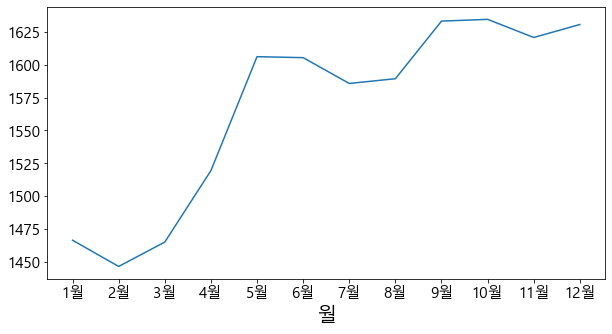

In [169]:
# 월_휘발유_평균.plot.bar()
# 월별 휘발유 가격 변화 추세 시각화
월_휘발유_평균.plot(kind='line', figsize=(10,5))

plt.xticks(range(1,13), labels=[f'{m}월' for m in range(1,13)])  #ticks위치, label(생략-tick의 위치가 label)
plt.show()

In [171]:
# 각 구의 월별 평균 휘발유 가격 
구_월별_휘발유_평균 = df.pivot_table(values='휘발유',
                                    index='월',
                                    columns='구',
                                    aggfunc='mean')
구_월별_휘발유_평균

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1,1619.865825,1503.383302,1357.002488,1376.357474,1429.822262,1379.168459,1418.589124,1360.297767,1406.245161,1373.606112,...,1479.271347,1403.604488,1417.573361,1404.158915,1486.227823,1781.412903,1363.895636,1749.433692,1848.913978,1360.405242
2,1600.945536,1478.109244,1345.565934,1370.397959,1405.984127,1362.851190,1408.949675,1337.986264,1397.600000,1365.634951,...,1466.242105,1386.097027,1406.561503,1389.676991,1454.418527,1739.352645,1330.018908,1730.007937,1848.380952,1343.332589
3,1616.143548,1468.138277,1342.990074,1392.716129,1403.370510,1388.360215,1427.221408,1371.192982,1421.683871,1390.093190,...,1480.578748,1397.505865,1421.064581,1415.321622,1466.712551,1806.438710,1367.174573,1741.992832,1870.634409,1364.818376
4,1666.350000,1526.341667,1414.246154,1447.910749,1456.301230,1451.507407,1477.038052,1438.646154,1484.722222,1451.424861,...,1528.055118,1450.840909,1464.520334,1479.093793,1522.575000,1836.563474,1439.952941,1779.411111,1904.650000,1429.393333
5,1739.208232,1605.267206,1500.025126,1543.218433,1548.151210,1547.330341,1566.923642,1529.620347,1586.740175,1545.358423,...,1617.527514,1546.357771,1553.783620,1558.715561,1602.545363,1893.453362,1539.197343,1856.232975,1985.540845,1518.455914
6,1744.065833,1608.388309,1491.889744,1522.746425,1564.633333,1540.320370,1562.271212,1510.461538,1569.823661,1548.606679,...,1626.147348,1554.769697,1554.568300,1548.231283,1586.283473,1901.231111,1531.676529,1863.500000,2011.624242,1512.642222
7,1734.204712,1588.002020,1469.147132,1502.133396,1543.155242,1508.003584,1542.331378,1491.776675,1552.664516,1523.568696,...,1600.178368,1534.840176,1540.997980,1525.377261,1570.332659,1901.079570,1507.068311,1860.078853,2004.487603,1480.929293
8,1735.209040,1589.324597,1468.318408,1508.055028,1543.354839,1512.141818,1543.788856,1491.372208,1556.690323,1526.870968,...,1601.345420,1544.298969,1545.417339,1532.414729,1574.178427,1902.374194,1508.076046,1863.913978,2006.897849,1493.768145
9,1773.644167,1638.926931,1514.569231,1554.135693,1586.991649,1558.492278,1585.204545,1539.167526,1601.920000,1570.620387,...,1646.283730,1581.690363,1597.801463,1576.305195,1629.180396,1946.780761,1549.731373,1917.268199,2056.847222,1530.306250


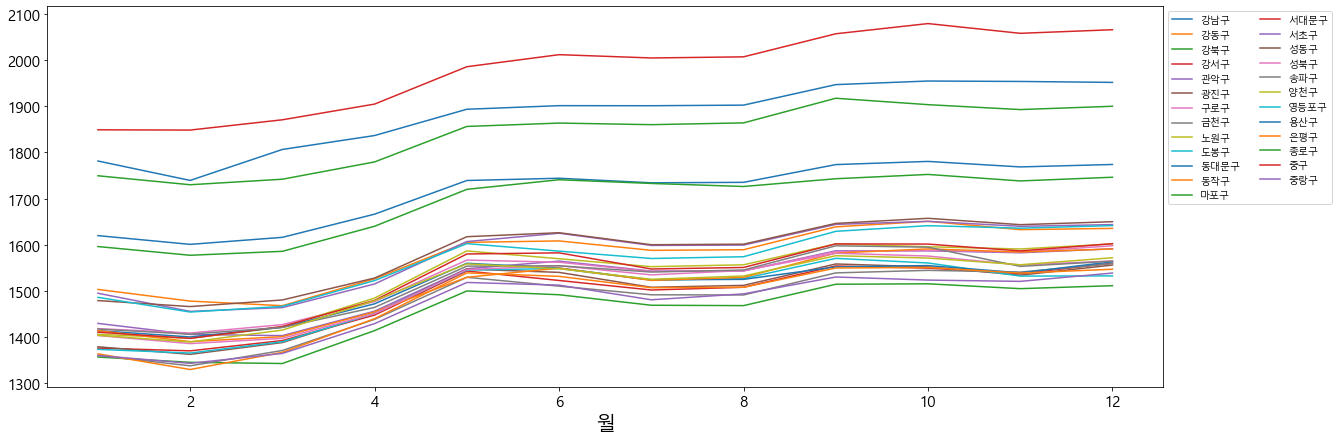

In [178]:
# 각 구의 월별 평균가격의 변화추이 시각화
구_월별_휘발유_평균.plot(kind='line', figsize=(20,7))
plt.legend(bbox_to_anchor=(1,1), 
           loc='upper left',
           ncol=2)
plt.show()

In [187]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,요일,일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,1,화,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,1,수,2
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,1,목,3
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,1,금,4
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,1,토,5


In [183]:
# 가장 휘발유가격이 비싼 주유소 상위 5 
# df.sort_values('휘발유',ascending=False).head()
# - 각 주유소별 평균 => 정렬
비싼주유소 = df.groupby('상호')['휘발유'].mean().sort_values(ascending=False).head()
비싼주유소

상호
서남주유소          2207.252055
장충주유소          2139.323288
뉴서울(강남)        2130.060274
SC(주) 역전주유소    2125.778082
필동주유소          2098.095890
Name: 휘발유, dtype: float64

In [186]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 
저렴한주유소 = df.groupby('상호')['휘발유'].mean().sort_values().head()
저렴한주유소

상호
(주)창원현대주유소           1362.553719
엘스카운티(주)천동주유소        1397.306452
SK네트웍스(주) 서울셀프주유소    1407.505051
KH에너지(주)직영 수명산주유소    1416.021739
이케이에너지㈜ 강산주유소        1416.290909
Name: 휘발유, dtype: float64

In [191]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates())
df.loc[(df['상호'] == '서남주유소') | (df['상호'] == '장충주유소') , ['상호','지역','주소']].drop_duplicates()

,상호,지역,주소
86231,서남주유소,서울 중구,서울 중구 통일로 30
86955,장충주유소,서울 중구,서울 중구 장충단로 202 (장충동1가)


In [195]:
비싼주유소.index

Index(['서남주유소', '장충주유소', '뉴서울(강남)', 'SC(주) 역전주유소', '필동주유소'], dtype='object', name='상호')

In [198]:
df.loc[df['상호'].isin(비싼주유소.index), ['상호','지역','주소']].drop_duplicates()

,상호,지역,주소
2896,뉴서울(강남),서울 강남구,서울 강남구 언주로 716 (논현동)
85869,SC(주) 역전주유소,서울 중구,서울 중구 퇴계로 15
86231,서남주유소,서울 중구,서울 중구 통일로 30
86955,장충주유소,서울 중구,서울 중구 장충단로 202 (장충동1가)
87317,필동주유소,서울 중구,서울 중구 퇴계로 196 (필동2가)


In [199]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
df.loc[df['상호'].isin(저렴한주유소.index), ['상호','지역','주소']].drop_duplicates()

,상호,지역,주소
9436,엘스카운티(주)천동주유소,서울 강동구,서울 강동구 천호대로 987 (천호동)
13472,KH에너지(주)직영 수명산주유소,서울 강서구,서울 강서구 남부순환로 195 (내발산동)
19607,SK네트웍스(주) 서울셀프주유소,서울 관악구,서울 관악구 신림로 183 (신림동)
46052,(주)창원현대주유소,서울 서대문구,서울 서대문구 통일로 537
61061,이케이에너지㈜ 강산주유소,서울 성북구,서울 성북구 보문로 27 (보문동7가)
